In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install pandas numpy openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import statistics
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Q1 - 3

In [6]:
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Purchase data')

print("The original dataframe: ")
print(df.head())

# filtering out the unwanted columns, storing selected columns into df
df = df[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]

print("\nThe filtered dataframe: ")
print(df.head())

# getting a list of the column names
print("\nThe columns of df: ")
print(df.columns.values.tolist())

# storing selected columns into matrix A
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]

# storing the last column into matrix C
C = df[['Payment (Rs)']]

print("\nThe matrices are: ")
print("A = ",A)
print("\nC = ",C)

# the dimensionality of the vector space for this data
def dimensionality(A):
    return A.shape[1]    # A.shape[1] - for number of columns

# Number of vectors existing in this vector space
def no_of_vectors(A):
    return A.shape[0]   # A.shape[0] - for number of rows

# rank of Matrix A
def rank(A):
    return np.linalg.matrix_rank(A)  # linalg - linear algebra

# Using Pseudo-Inverse to find the cost of each product available for sale. 
def Pseudo_Inverse(A):
    return np.linalg.pinv(A)

# Usin the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.
def predicting_the_cost(A):
    A_pseudo_inv = Pseudo_Inverse(A)
    return A_pseudo_inv @ C         # "@" to multiply matrices

print("\nPredicting the cost of the products available with the vendor:\n", predicting_the_cost(A))

# A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior
def compute_labels(C):
    return np.where(C > 200, 'RICH', 'POOR').flatten()

def classifier_model():
    y = compute_labels(C)
    X = A   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
      
    y_pred = model.predict(X_test)
      
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
   
    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))

def main():
    # A1
    print(f"\nDimensionality of the vector space is: {dimensionality(A)}")
    print(f"\nNumber of vectors is: {no_of_vectors(A)}")
    print(f"\nRank of Matrix A: {rank(A)}")
    
    # A2
    print("\nCost of each product:")
    print(Pseudo_Inverse(A))
    
    # A3
    classifier_model()
    
if __name__ == "__main__":
    main()

The original dataframe: 
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN     

# Q4

           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  

Mean =  1560.6634538152612
Variance =  58732.36535253922

            Date Month  Day    Price     Open     High      Low   Volume  \
4   Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
9   Jun 16, 2021   Jun  Wed  2089.95  2109.45  2121.95  2075.30  856.94K   
14  Jun 09, 2021   Jun  Wed  2071.20  2160.00  2163.00  2060.00    2.34M   
19  Jun 02, 2021   Jun  Wed  1917.95  1899.95  1927.50  1895.25  576.76K   
24  May 26, 2021   May  Wed  1894.05  

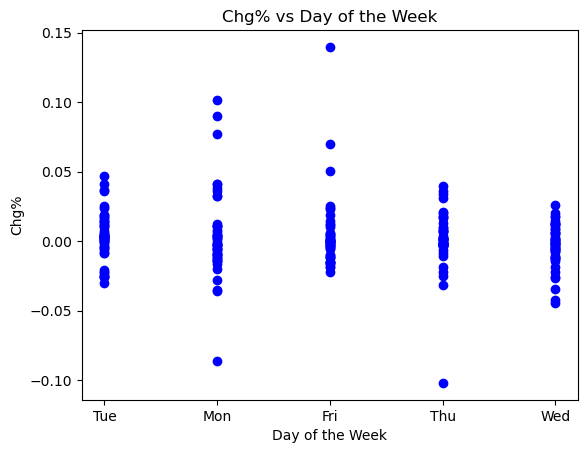

In [8]:
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
print(df.head())

# Calculate the mean and variance of the Price data present in column D. 
mean = df['Price'].mean()
var = df['Price'].var()
print('\nMean = ', mean)
print('Variance = ', var)
print()


# Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations.
# df[df['column_name'] == 'row_value'] ==> returns rows with value 'row_value' in the column 'column_name'
wednesday_df = df[df['Day'] == 'Wed']  
print(wednesday_df.head())
print()

wednesday_mean = wednesday_df['Price'].mean()
print('Wednesday mean = ', wednesday_mean)
print('Population mean = ', mean)

# comparing wednesday price mean with the population mean
if wednesday_mean > mean:
    print("Observation: The sample mean for Wednesdays is higher than the population mean.")
elif wednesday_mean < mean:
    print("Observation: The sample mean for Wednesdays is lower than the population mean.")
else:
    print("Observation: The sample mean for Wednesdays is equal to the population mean.")

print()
# Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.
april_df = df[df['Month'] == 'Apr']
print(april_df.head())
print()

april_mean = april_df['Price'].mean()
print('April mean = ', april_mean)
print('Population mean = ', mean)

# comparing april price mean with the population mean
if april_mean > mean:
    print("Observation: The sample mean for April is higher than the population mean.")
elif april_mean < mean:
    print("Observation: The sample mean for April is lower than the population mean.")
else:
    print("Observation: The sample mean for April is equal to the population mean.")
print()

# From the Chg% (available in column I) find the probability of making a loss over the stock. (Suggestion: use lambda function to find negative values)
# using lambda functions :-
negative_changes = df['Chg%'].apply(lambda x: x < 0)
probability_of_loss = negative_changes.mean()
print(f"Probability of making a loss: {probability_of_loss:.2f}")
print()
# ----- OR ------
chg_df = df[df['Chg%'] < 0]
print(chg_df.head())

total_days = len(df)
loss_days = len(chg_df)
prob_of_loss = loss_days / total_days

print(f"\nProbability of making a loss: {prob_of_loss:.2f}")
print()

# Calculate the probability of making a profit on Wednesday. 
wed_profit = df[df['Day'] == 'Wed']
print(wed_profit.head())
print()

wed_profit = ((wed_profit['Chg%'] > 0).sum()) / len(wed_profit)
print(f"\nProbability of making a profit on Wednesday: {wed_profit}")
print()


# Calculate the conditional probability of making profit, given that today is Wednesday.
overall_profit_probability = len(df[df['Chg%'] > 0]) / len(df)
conditional_profit_probability = wed_profit / overall_profit_probability
print(f"Conditional probability of making profit given it's Wednesday: {conditional_profit_probability}")
print()


# Make a scatter plot of Chg% data against the day of the week
plt.scatter(df['Day'], df['Chg%'], color='blue')
plt.title('Chg% vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.show()


# Q 5-10

## Data Exploration

In [11]:
# Load the data from the Excel file
file_path = r'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Display the first few rows of the dataframe
print(df.head())

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

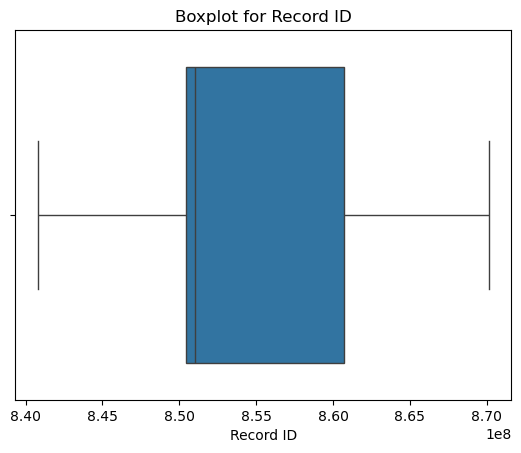

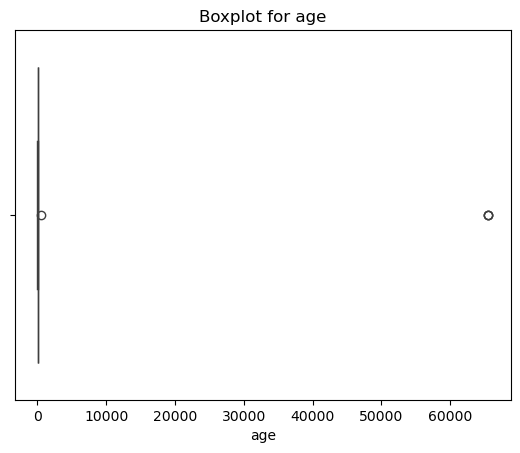

         Record ID           age
mean  8.529473e+08  7.355582e+01
var   5.748625e+13  1.401801e+06


In [12]:
# Study each attribute and associated values present. Identify the datatype (nominal etc.) for the attribute. 
print(df.info())
print(df.describe(include='all'))

# For categorical attributes, identify the encoding scheme to be employed. (Guidance: employ label encoding for ordinal variables while One-Hot encoding
# may be employed for nominal variables). 
data_types = df.dtypes
print(data_types)

# Study the presence of missing values in each attribute. 
missing_values = df.isnull().sum()
print(missing_values)

# Study data range for numeric variables
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_range = df[numeric_columns].describe()
print(numeric_range)

# Study presence of outliers in data.  
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# For numeric variables, calculate the mean and variance (or standard deviation). 
mean_variance = df[numeric_columns].agg(['mean', 'var'])
print(mean_variance)


## Data Imputation

In [14]:
# Mean may be used when the attribute is numeric with no outliers
# Median may be employed for attributes which are numeric and contain outliers 
for column in numeric_columns:
    if not df[column].isnull().any():
        continue
    if df[column].isna().sum() > 0:
        if any(df[column] > df[column].mean() + 3 * df[column].std()) or any(df[column] < df[column].mean() - 3 * df[column].std()):
            # Median for numeric attributes with outliers
            df[column].fillna(df[column].median(), inplace=True)
        else:
            # Mean for numeric attributes without outliers
            df[column].fillna(df[column].mean(), inplace=True)

# Mode may be employed for categorical attributes 
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

print(df.isnull().sum())


Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: int64


C:\Users\Sneha\AppData\Local\Temp\ipykernel_26052\2096935994.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


## Data Normalization / Scaling

In [16]:
# Example normalization for numeric columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print(df.head())

   Record ID       age sex on thyroxine query on thyroxine  \
0  -1.602090 -0.037634   F            f                  f   
1  -1.602090 -0.037634   F            f                  f   
2  -1.602086 -0.027499   F            f                  f   
3  -1.601822 -0.031722   F            f                  f   
4  -1.601822 -0.035100   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f

In [17]:
print(df.columns)

Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


In [28]:
# Print column names to check for correct names
print("Column names in the DataFrame:", df.columns)

# Define the correct binary columns (adjust as needed based on your actual data)
binary_columns = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                   'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
                   'query hypothyroid', 'query hyperthyroid', 'lithium', 
                   'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured']

# Take the first 2 observation vectors
obs1 = df.iloc[0]
obs2 = df.iloc[1]

# Check if columns exist in DataFrame
missing_cols = [col for col in binary_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Columns missing from DataFrame: {missing_cols}")

# Extract binary attributes for both observations from the DataFrame
obs1_binary = df.loc[0, binary_columns]
obs2_binary = df.loc[1, binary_columns]

# Convert to binary if necessary (ensure they are actually binary 0/1)
obs1_binary = obs1_binary.apply(lambda x: 1 if str(x).lower() == 't' else 0)
obs2_binary = obs2_binary.apply(lambda x: 1 if str(x).lower() == 't' else 0)

# Debugging: Print extracted binary attributes
print("obs1_binary:\n", obs1_binary)
print("obs2_binary:\n", obs2_binary)

# Calculate JC and SMC
f11 = np.sum((obs1_binary == 1) & (obs2_binary == 1))
f00 = np.sum((obs1_binary == 0) & (obs2_binary == 0))
f01 = np.sum((obs1_binary == 0) & (obs2_binary == 1))
f10 = np.sum((obs1_binary == 1) & (obs2_binary == 0))

# Debugging: Print values of f11, f00, f01, and f10
print(f"f11: {f11}, f00: {f00}, f01: {f01}, f10: {f10}")

# Compute Jaccard Coefficient (JC)
denominator_jc = (f01 + f10 + f11)
if denominator_jc != 0:
    jc = f11 / denominator_jc
else:
    jc = np.nan  # or some default value if you prefer

# Compute Simple Matching Coefficient (SMC)
denominator_smc = (f00 + f01 + f10 + f11)
if denominator_smc != 0:
    smc = (f11 + f00) / denominator_smc
else:
    smc = np.nan  # or some default value if you prefer

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

Column names in the DataFrame: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
obs1_binary:
 on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0


##  Similarity Measure

In [24]:
# Assuming df is your DataFrame
print("Column names in the DataFrame:", df.columns)

# Define the correct binary columns (adjust as needed based on your actual data)
binary_columns = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                  'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
                  'query hypothyroid', 'query hyperthyroid', 'lithium', 
                  'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured']

# Take the first 2 observation vectors
obs1 = df.iloc[0]
obs2 = df.iloc[1]

# Check if columns exist in DataFrame
missing_cols = [col for col in binary_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Columns missing from DataFrame: {missing_cols}")

# Extract binary attributes for both observations from the DataFrame
obs1_binary = df.loc[0, binary_columns]
obs2_binary = df.loc[1, binary_columns]

# Convert to binary if necessary (ensure they are actually binary 0/1)
obs1_binary = obs1_binary.apply(lambda x: 1 if str(x).lower() == 't' else 0)
obs2_binary = obs2_binary.apply(lambda x: 1 if str(x).lower() == 't' else 0)

# Debugging: Print extracted binary attributes
print("obs1_binary:\n", obs1_binary)
print("obs2_binary:\n", obs2_binary)

# Calculate JC and SMC
f11 = np.sum((obs1_binary == 1) & (obs2_binary == 1))
f00 = np.sum((obs1_binary == 0) & (obs2_binary == 0))
f01 = np.sum((obs1_binary == 0) & (obs2_binary == 1))
f10 = np.sum((obs1_binary == 1) & (obs2_binary == 0))

# Debugging: Print values of f11, f00, f01, and f10
print(f"f11: {f11}, f00: {f00}, f01: {f01}, f10: {f10}")

# Compute Jaccard Coefficient (JC)
denominator_jc = (f01 + f10 + f11)
if denominator_jc != 0:
    jc = f11 / denominator_jc
else:
    jc = np.nan  # or some default value if you prefer

# Compute Simple Matching Coefficient (SMC)
denominator_smc = (f00 + f01 + f10 + f11)
if denominator_smc != 0:
    smc = (f11 + f00) / denominator_smc
else:
    smc = np.nan  # or some default value if you prefer

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

Column names in the DataFrame: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
obs1_binary:
 on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0


##  Cosine Similarity Measure

In [30]:
# Print column names to check for correct names
print("Column names in the DataFrame:", df.columns)

# Define columns to use for cosine similarity
columns_to_use = df.columns  # Use all columns or specify a subset as needed

# Preprocess the data
# Convert categorical columns to numerical values using LabelEncoder
df_preprocessed = df.copy()

# Apply LabelEncoder to categorical columns
for column in df_preprocessed.columns:
    if df_preprocessed[column].dtype == 'object':
        le = LabelEncoder()
        df_preprocessed[column] = df_preprocessed[column].astype(str)  # Ensure data is in string format
        df_preprocessed[column] = le.fit_transform(df_preprocessed[column])

# Handle missing values (e.g., replacing with 0 or mean)
df_preprocessed.fillna(0, inplace=True)

# Take the complete vectors for the first two observations
obs1_complete = df_preprocessed.iloc[0].values.reshape(1, -1)
obs2_complete = df_preprocessed.iloc[1].values.reshape(1, -1)

# Calculate Cosine similarity
cosine_sim = cosine_similarity(obs1_complete, obs2_complete)[0][0]

print(f"Cosine Similarity: {cosine_sim}")


Column names in the DataFrame: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
Cosine Similarity: 0.8191836810158587


## Heatmap Plot

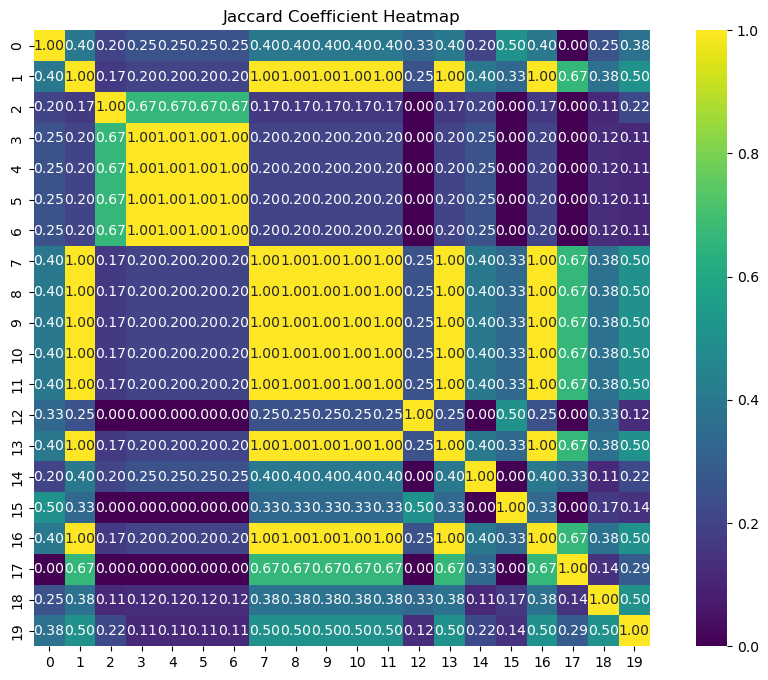

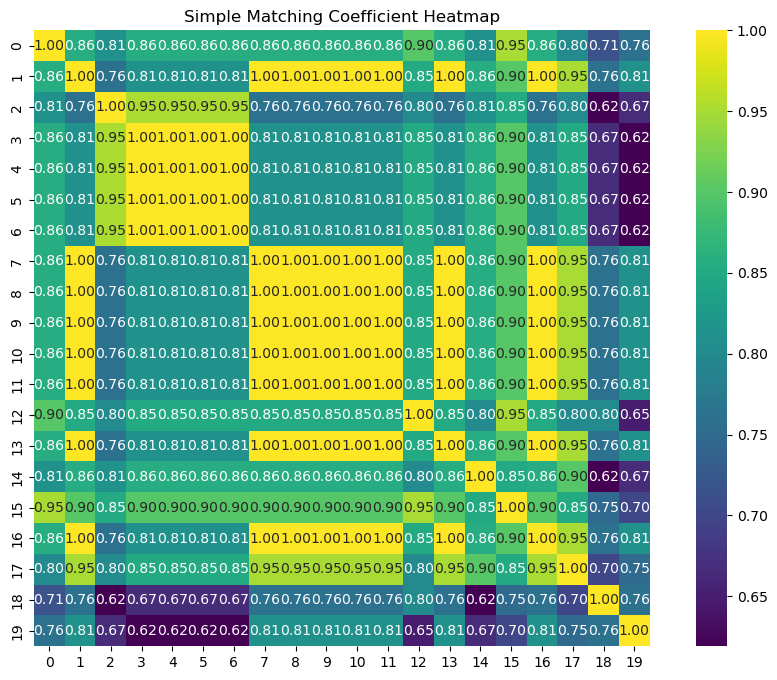

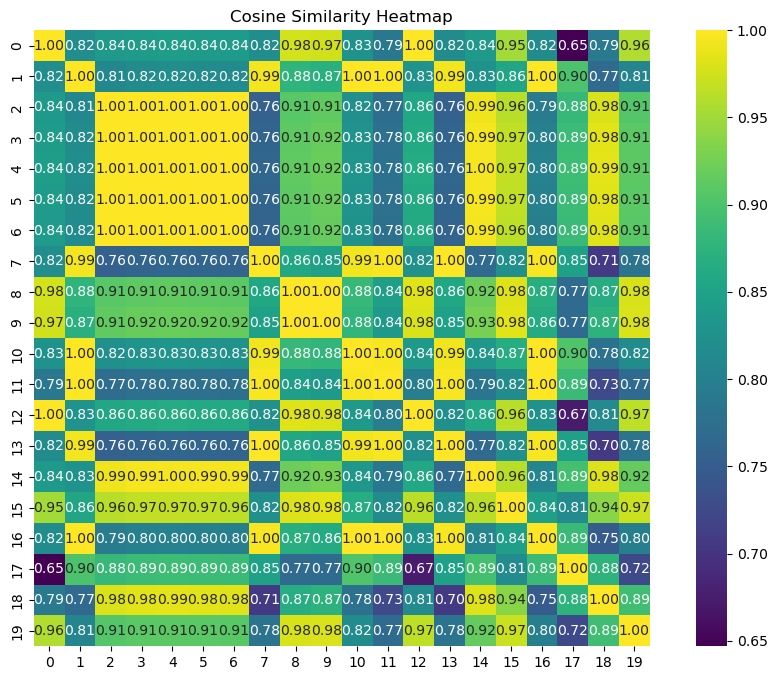

In [32]:
# Take the first 20 observations
df_20 = df.head(20)

# Convert categorical data to binary and handle missing values
df_20_binary = df_20.copy()
for column in df_20_binary.columns:
    if df_20_binary[column].dtype == 'object':
        le = LabelEncoder()
        df_20_binary[column] = df_20_binary[column].astype(str)
        df_20_binary[column] = le.fit_transform(df_20_binary[column])

df_20_binary.fillna(0, inplace=True)

# Function to calculate JC and SMC
def calculate_similarity_matrix(df_binary, similarity_type='JC'):
    n = df_binary.shape[0]
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            obs1_binary = df_binary.iloc[i].values
            obs2_binary = df_binary.iloc[j].values
            
            f11 = np.sum((obs1_binary == 1) & (obs2_binary == 1))
            f00 = np.sum((obs1_binary == 0) & (obs2_binary == 0))
            f01 = np.sum((obs1_binary == 0) & (obs2_binary == 1))
            f10 = np.sum((obs1_binary == 1) & (obs2_binary == 0))
            
            if similarity_type == 'JC':
                denominator = (f01 + f10 + f11)
                similarity = f11 / denominator if denominator != 0 else np.nan
            elif similarity_type == 'SMC':
                denominator = (f00 + f01 + f10 + f11)
                similarity = (f11 + f00) / denominator if denominator != 0 else np.nan
            else:
                raise ValueError("Unsupported similarity type")
            
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Symmetric matrix
    
    return similarity_matrix

# Calculate JC and SMC matrices
jc_matrix = calculate_similarity_matrix(df_20_binary, similarity_type='JC')
smc_matrix = calculate_similarity_matrix(df_20_binary, similarity_type='SMC')

# Calculate Cosine Similarity matrix
def calculate_cosine_similarity_matrix(df):
    n = df.shape[0]
    cosine_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            obs1 = df.iloc[i].values.reshape(1, -1)
            obs2 = df.iloc[j].values.reshape(1, -1)
            cosine_sim = cosine_similarity(obs1, obs2)[0][0]
            cosine_matrix[i, j] = cosine_sim
            cosine_matrix[j, i] = cosine_sim  # Symmetric matrix
    
    return cosine_matrix

cosine_matrix = calculate_cosine_similarity_matrix(df_20_binary)

# Plot Jaccard Coefficient heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(jc_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
plt.title('Jaccard Coefficient Heatmap')
plt.show()

# Plot Simple Matching Coefficient heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(smc_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
plt.title('Simple Matching Coefficient Heatmap')
plt.show()

# Plot Cosine Similarity heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cosine_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
plt.title('Cosine Similarity Heatmap')
plt.show()
